Nesse módulo, iremos trabalhar com a base de dados da PeNSE (Pesquisa Nacional de Saúde do Estudante) feita no ano de 2015, com alunos entre 13 e 17 anos. 

De acordo com o IBGE, ela irá fornecer informações sobre as características socioeconômicas da população de estudo, do ambiente escolar e do entorno e informações relacionadas à infraestrutura disponível para alimentação e atividade física, acessibilidade, saneamento básico entre outros aspectos.

Os dados estão disponíveis no [site do IBGE](https://www.ibge.gov.br/estatisticas/sociais/educacao/9134-pesquisa-nacional-de-saude-do-escolar?=&t=o-que-e). O acesso foi realizado no dia 08 de dezembro de 2020.

## AULA 1 - EDUCAÇÃO, SAÚDE E TIPOS DE DADOS 

### VIDEO 1 - Lendo arquivos compactados

In [1]:
import pandas as pd
from zipfile import ZipFile
import seaborn as sns

path = '/content/drive/MyDrive/AluraBootcamp/Modulo3/PeNSE_2015_AMOSTRA2.zip'

zip = ZipFile(path)

In [2]:
zip.infolist()

[<ZipInfo filename='arquivos csv/' external_attr=0x10>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV' compress_type=deflate external_attr=0x20 file_size=7262170 compress_size=1235667>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ALUNOESCOLA.CSV' compress_type=deflate external_attr=0x20 file_size=11420533 compress_size=1329882>,
 <ZipInfo filename='arquivos csv/PENSE_AMOSTRA2_ESCOLA.CSV' compress_type=deflate external_attr=0x20 file_size=5000642 compress_size=114324>,
 <ZipInfo filename='arquivos sas/' external_attr=0x10>,
 <ZipInfo filename='arquivos sas/pense_amostra2_aluno.sas7bdat' compress_type=deflate external_attr=0x20 file_size=24691712 compress_size=1957530>,
 <ZipInfo filename='arquivos sas/pense_amostra2_alunoescola.sas7bdat' compress_type=deflate external_attr=0x20 file_size=45253632 compress_size=2461932>,
 <ZipInfo filename='arquivos sas/pense_amostra2_escola.sas7bdat' compress_type=deflate external_attr=0x20 file_size=18105344 compress_size=332162>,
 <Zip

No arquivo ZIP, temos 3 arquivos .csv:

*   PENSE_AMOSTRA2_ALUNO.CSV
*   PENSE_AMOSTRA2_ALUNOESCOLA.CSV
*   PENSE_AMOSTRA2_ESCOLA.CSV

Para esse módulo, vamos utilizar o primeiro.



In [3]:
df = pd.read_csv(('/content/drive/MyDrive/AluraBootcamp/Modulo3/PeNSE_2015_AMOSTRA2/arquivos csv/PENSE_AMOSTRA2_ALUNO.CSV'), sep = ";", engine = "python")
df.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,"37,1",157,2,1,1223,1,"299,735235",1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,"50,2",152,2,2,1223,1,"355,170081",1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,"48,2","161,4",2,2,1223,1,"299,735235",1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,"69,4","172,5",2,3,1223,1,"355,170081",1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,"78,9","167,5",2,4,1223,1,"299,735235",1,2,4,1,5,1,296


#### Desafio 01 - Descompactar a pasta zipada usando outro método (Dica Allan, é utilizar comandos Bash).

* Solucionado utilizando o comando !unzip.

#### Desafio 02 - Estudar sobre a base de dados que vamos trabalhar. (PeNSE - 2015 Amostra 2)

* Aproveitei o desafio para escrever uma pequena introdução para o módulo.

In [4]:
# !unzip '/content/drive/MyDrive/AluraBootcamp/Modulo3/PeNSE_2015_AMOSTRA2.zip' -d '/content/drive/MyDrive/AluraBootcamp/Modulo3/PeNSE_2015_AMOSTRA2'

### VIDEO 2 - Tipos de dados

In [5]:
df.head(10)

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,"37,1",157,2,1,1223,1,"299,735235",1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,"50,2",152,2,2,1223,1,"355,170081",1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,"48,2","161,4",2,2,1223,1,"299,735235",1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,"69,4","172,5",2,3,1223,1,"355,170081",1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,"78,9","167,5",2,4,1223,1,"299,735235",1,2,4,1,5,1,296
5,2015,76,1,1,2,4,14,12,6,1,1,7,3,2,-1,1,1,1,1,1,2,4,1,4,1,2,2,5,3,7,7,8,3,8,1,5,6,1,4,1,...,2,2,4,2,2,4,1,2,2,1,1,1,1,2,1,2,2,2,1,2,2,2,1,2,729.0,1605.0,"72,9","160,5",2,4,1223,1,"355,170081",1,2,4,1,6,1,296
6,2015,76,1,1,2,1,14,3,7,1,1,7,3,2,-1,1,1,1,1,1,2,5,1,4,1,2,2,5,3,8,2,3,1,3,2,1,1,5,4,1,...,2,2,2,5,5,4,1,3,1,2,3,5,1,1,2,2,2,2,2,1,2,2,2,2,493.0,1575.0,"49,3","157,5",2,2,1223,1,"355,170081",1,2,4,1,7,1,296
7,2015,76,1,1,2,3,14,4,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,1,4,1,2,2,5,3,7,2,3,5,5,3,1,5,1,-1,2,...,2,2,4,1,1,4,1,2,3,1,2,-1,1,1,2,2,1,2,2,2,2,2,2,2,669.0,1594.0,"66,9","159,4",2,3,1223,1,"355,170081",1,2,4,1,8,1,296
8,2015,76,1,1,1,4,13,8,7,1,1,7,5,2,-1,2,1,1,1,1,2,3,2,4,1,2,2,5,3,2,1,5,3,6,2,1,4,1,-1,2,...,2,2,4,1,1,4,1,1,1,3,2,7,1,-1,2,2,1,2,2,2,2,2,2,2,783.0,1700.0,"78,3",170,2,4,1223,1,"299,735235",1,2,4,1,9,1,296
9,2015,76,1,1,2,1,14,7,6,1,2,7,2,2,-1,1,1,1,1,1,1,3,2,4,1,2,2,5,2,2,2,1,7,3,3,1,1,1,-1,2,...,2,1,2,2,3,4,1,2,1,2,2,13,1,1,2,2,2,2,2,2,2,2,1,2,479.0,1562.0,"47,9","156,2",2,2,1223,1,"355,170081",1,2,4,1,10,1,296


In [6]:
df.shape

(16556, 181)

In [7]:
 df.columns

Index(['ANOPESQ', 'PAIS', 'REGEOGR', 'VB00004', 'VB01001', 'VB01002',
       'VB01003', 'VB01004', 'VB01005', 'VB01006',
       ...
       'ESTRATO_EXP', 'ESTRATOGEOREG', 'PESO', 'V0006', 'V0007', 'V0008',
       'V0041', 'aluno', 'escola', 'turma'],
      dtype='object', length=181)

Para entender melhor o que cada uma das colunas significa, é válida a leitura da documentação (Dicionario_PENSE_Microdados_AMOSTRA2.xls). 

Será utilizado o df.info() para entender com que tipo de dado estamos trabalhando.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(7), int64(171), object(3)
memory usage: 22.9+ MB


São em usa maioria colunas numéricas (float64 e int64). O que chama atenção são as colunas que possuem dados no formato de *object*, uma vez que quando utilizado o df.head() não apareceu nenhuma coluna não-numérica. 

In [9]:
df.select_dtypes(include = object)

,VB17003,VB17004,PESO
0,"37,1",157,"299,735235"
1,"50,2",152,"355,170081"
2,"48,2","161,4","299,735235"
3,"69,4","172,5","355,170081"
4,"78,9","167,5","299,735235"
...,...,...,...
16551,"56,7","167,9","447,815539"
16552,"61,9","185,8","592,50744"
16553,"60,9","159,4","401,131512"
16554,"47,3","157,8","442,718091"


Diferentemente do Brasil, o pandas utiliza "." como separador decimal. Para consertar isso, podemos utilizar srt.replace nas colunas.

Também sobre as colunas:
* VB17003: Altura do estudante, incluindo os imputados, com uma casa decimal;
* VB17004: Variável identificadora se houve imputação no peso e/ou altura do estudante;
* PESO: Peso do aluno de acordo com a amostra, utilizado para expansão.

In [10]:
df[['VB17003', 'VB17004', 'PESO']] = df[['VB17003', 'VB17004', 'PESO']].replace(',',".", regex = True)
df[['VB17003', 'VB17004', 'PESO']] = df[['VB17003', 'VB17004', 'PESO']].astype(float)
df[['VB17003', 'VB17004', 'PESO']] 

,VB17003,VB17004,PESO
0,37.1,157.0,299.735235
1,50.2,152.0,355.170081
2,48.2,161.4,299.735235
3,69.4,172.5,355.170081
4,78.9,167.5,299.735235
...,...,...,...
16551,56.7,167.9,447.815539
16552,61.9,185.8,592.507440
16553,60.9,159.4,401.131512
16554,47.3,157.8,442.718091


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(10), int64(171)
memory usage: 22.9 MB


In [12]:
df.select_dtypes(include = 'float64')

,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,VB17001,VB17002,VB17003,VB17004,PESO
0,0.0,15.0,0.0,15.0,60.0,371.0,1570.0,37.1,157.0,299.735235
1,120.0,510.0,260.0,130.0,300.0,502.0,1520.0,50.2,152.0,355.170081
2,0.0,585.0,130.0,455.0,420.0,482.0,1614.0,48.2,161.4,299.735235
3,0.0,0.0,0.0,0.0,0.0,694.0,1725.0,69.4,172.5,355.170081
4,30.0,165.0,90.0,45.0,60.0,789.0,1675.0,78.9,167.5,299.735235
...,...,...,...,...,...,...,...,...,...,...
16551,30.0,400.0,110.0,260.0,240.0,567.0,1679.0,56.7,167.9,447.815539
16552,20.0,800.0,325.0,455.0,240.0,619.0,1858.0,61.9,185.8,592.507440
16553,0.0,0.0,0.0,0.0,60.0,609.0,1594.0,60.9,159.4,401.131512
16554,75.0,215.0,35.0,105.0,120.0,473.0,1578.0,47.3,157.8,442.718091


* VB7001: Qual é o peso do(a) aluno(a)?
* VB7002: Qual é a altura do(a) aluno(a)?
* VB7003: Peso do estudante, incluindo os imputados, com uma casa decimal 
* VB7003: Altura do estudante, incluindo os imputados, com uma casa decimal

O dicionário também adiciona que respostas com o valor 998 significam "Não informado" e com o valor 9999 significam "Recusa ou impossibilidade de medição"

Podemos definir as respostas dessas perguntas como dados quantitativos e continuos. Já a idade, por exemplo, é um dado quantitativo e discreto.

DEFINIÇÃO:

* DADO QUANTITATIVO:

    Descreve quantidades numéricas.
  * Váriavel Discreta: Descreve uma quantidade contável (população, idade);
  * Váriavel Contínua: Descreve medições (área total, peso e etc.).


* DADO QUALITATIVO:

    Descreve categorias, nomes, qualidades, etc.
  * Váriavel Nominal: Não pode ser ordenada (nomes de países, por exemplo);
  * Váriavel Ordinal: Pode ser ordenada seguindo um critério quantitativo (meses, escolaridade, classe social e etc).




#### Desafio 03:  Desafio 03 - Classificar algumas perguntas como QualitativaXQuantitativa

* Que idade você tinha quando experimentou fumar cigarro pela primeira vez? - Quantitativa Discreta

* NOS ÚLTIMOS 30 DIAS, em quantos dias você fumou cigarros? - Qualitativo Ordinal

* NOS ÚLTIMOS 30 DIAS, em geral, como você conseguiu seus próprios cigarros? - Qualitativo Nominal

* Qual outro produto do tabaco você usou com mais frequência NOS ÚLTIMOS 30 DIAS? - Qualitativo Nominal

* NOS ÚLTIMOS 7 DIAS, em quantos dias pessoas fumaram na sua presença? - Qualitativo Ordinal

* NOS ÚLTIMOS 30 DIAS, com que frequência seus pais ou responsáveis entenderam seus problemas e preocupações? - Qualitativo Ordinal

* NOS ÚLTIMOS 12 MESES, com que frequência você não conseguiu dormir à noite porque algo o(a) preocupava muito? - Qualitativo Ordinal

## AULA 2 - DADOS QUALITATIVOS E TABELAS DE FREQUÊNCIA

In [13]:
df.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296


Podemos utilizar o .value_counts() para criar uma tabela de frequência do dataset da PeNSE. No exemplo abaixo, iremos descobrir a frequência de cada sexo utilizando a pergunta "VB01001".

In [14]:
df["VB01001"].value_counts()

1    8287
2    8269
Name: VB01001, dtype: int64

In [15]:
# Para a porcentagem, podemos utilizar o argumento normalize dentro da função:
df["VB01001"].value_counts(normalize = True) * 100

1    50.054361
2    49.945639
Name: VB01001, dtype: float64

É possível perceber que a distribuição do sexo dos alunos participantes da pesquisa é bem equilibrada. 

Vamos fazer o mesmo processo para a pergunta VB11007: "Como você se sente em relação ao seu corpo?"

In [16]:
df["VB11007"].value_counts(normalize = True) * 100

2     41.797536
1     27.832810
4     14.049287
3     10.914472
5      4.312636
99     1.093259
Name: VB11007, dtype: float64

De acordo com a documetação, os números correspodem às seguintes respostas:

1. Muito satisfeito(a)
2. Satisfeito(a)
3. Indiferente
4. Insatisfeito(a)
5. Muito insatisfeito(a)

  99 Não Informado.

Podemos verificar que a distribuição dos dados está menos equilibrada dessa vez, com mais alunos se mostrando satisfeitos com seu próprio corpo. 

A instatisfação com a sua imagem corporal atinge aproximadamente 15% dos alunos pesquisados.

In [17]:
frequencia = df["VB11007"].value_counts()
percentual = df["VB11007"].value_counts(normalize = True) * 100

dist_freq = pd.DataFrame({'frequencia': frequencia, "percentual": percentual})

In [18]:
dist_freq

# Agora falta apenas passar as respostas para as linhas:

,frequencia,percentual
2,6920,41.797536
1,4608,27.832810
4,2326,14.049287
3,1807,10.914472
5,714,4.312636
99,181,1.093259


In [19]:
respostas = {
    1 : "Muito Satisfeito",
    2 : "Satisfeito",
    3 : "Indiferente",
    4 : "Insatisfeito",
    5 : "Muito Insatisfeito",
    99 : "Não Informado"
}

dist_freq.rename(index = respostas, inplace = True)
dist_freq.rename_axis("Sentimento em relação ao próprio corpo", axis = 1, inplace = True)
dist_freq

Sentimento em relação ao próprio corpo,frequencia,percentual
Satisfeito,6920,41.797536
Muito Satisfeito,4608,27.832810
Insatisfeito,2326,14.049287
Indiferente,1807,10.914472
Muito Insatisfeito,714,4.312636
Não Informado,181,1.093259


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

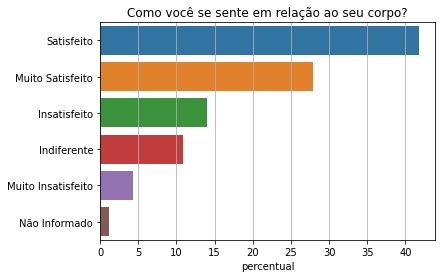

In [21]:
ax = sns.barplot(data = dist_freq, x = "percentual", y = dist_freq.index)
plt.title("Como você se sente em relação ao seu corpo?")
plt.grid(axis = "x")

In [22]:
dist_freq

Sentimento em relação ao próprio corpo,frequencia,percentual
Satisfeito,6920,41.797536
Muito Satisfeito,4608,27.832810
Insatisfeito,2326,14.049287
Indiferente,1807,10.914472
Muito Insatisfeito,714,4.312636
Não Informado,181,1.093259


#### Desafio 04: Criar uma função para gerar uma tabela de frequência e fazer a análise de outras informações. Compartilhar no discord suas análises:

In [23]:
import re
dicionario = pd.read_excel("/content/drive/MyDrive/AluraBootcamp/Modulo3/PeNSE_2015_AMOSTRA2/Dicionario_PENSE_Microdados_AMOSTRA2.xls")


In [24]:
def criar_dicionario_respostas(cod_pergunta: str, dicionario = dicionario):

  '''
  Essa função serve como uma função helper para a criar_tab_freq(). Ela aceita
  um código de pergunta como argumento e retorna um dicionário com as váriaveis 
  como keys e as alternativas de resposta como values, além do index dessa pergunta
  no dicionário.

  cod_pergunta: string contendo o código da pergunta. Ex.: "VB02001"

  dicionario: variável em que está armazenado o dataframe contendo o arquivo 
  Dicionario_PENSE_Microdados_AMOSTRA2.xls.

  Ideia do Lucas Porto no discord do bootcamp
  '''

  # fazendo a query e selecionando o index da pergunta no dicionário
  busca = dicionario.loc[dicionario['VARIÁVEL'] == cod_pergunta]
  index_pergunta = (busca.index).tolist()[0]

  # criando um dataframe somente para as possiveis respostas
  dataframe_respostas = pd.DataFrame(columns= ['VARIÁVEL','QUESTIONÁRIO DO ALUNO'])

  # enquanto não encontra o index com a próxima pergunta (VB), 
  # adiciona as váriaveis e as possíveis respostas ao dataframe criado

  # for index in range(index_pergunta + 1, index_pergunta + 20):
  #   if str(dicionario.loc[index]['VARIÁVEL']).startswith('VB') == True:
  #     break
  #   else:
  #     new_row = {'VARIÁVEL': int(dicionario.loc[index]['VARIÁVEL']),
  #               'QUESTIONÁRIO DO ALUNO' : dicionario.loc[index]['QUESTIONÁRIO DO ALUNO']}
      
  #     dataframe_respostas = dataframe_respostas.append(new_row, ignore_index = True)

  for index in range(index_pergunta + 1, index_pergunta + 20):
    if str(dicionario.loc[index]['VARIÁVEL'])[0].isalpha():
      break
    else:
      try:
        new_row = {'VARIÁVEL': int(dicionario.loc[index]['VARIÁVEL']),
                  'QUESTIONÁRIO DO ALUNO' : dicionario.loc[index]['QUESTIONÁRIO DO ALUNO']}
        
        dataframe_respostas = dataframe_respostas.append(new_row, ignore_index = True)
      except ValueError:
        return dataframe_respostas.set_index("VARIÁVEL").to_dict(), index_pergunta

  return dataframe_respostas.set_index("VARIÁVEL").to_dict(), index_pergunta

In [25]:
def criar_tab_freq(cod_pergunta: str, titulo_perg = '', dicionario = dicionario, df = df, plot = False):

  ''' 
  Essa função pede um código de pergunta e retorna um dataframe contendo a tabela
  de frequencia das respostas dessa pergunta na PeNSE 2015. 
  Ela aceita os seguintes argumentos:
  
  cod_pergunta: string contendo o código da pergunta. Ex.: "VB02001"
  
  titulo_pergunta: string contendo um novo titulo para a pergunta. Se deixado em
  branco, utiliza o original.

  dicionario: variável em que está armazenado o dataframe contendo o arquivo 
  Dicionario_PENSE_Microdados_AMOSTRA2.xls.

  df: variável em que está armazenado o dataframe contendo o arquivo 
  PENSE_AMOSTRA2_ALUNO.csv.

  plot: Aceita um boolean. Em caso de True, a função também plotara
  automaticamente um gráfico de barras da tabela de frequencia utilizando o sns.

  '''

  # Criando o dict com as respostas e pegando index da pergunta no dicionario
  dict_respostas, idx = criar_dicionario_respostas(cod_pergunta)

  # Calculando os dados de frequencia para a tabela
  frequencia = df[cod_pergunta].value_counts()
  percentual = df[cod_pergunta].value_counts(normalize = True) * 100

  # Selecionando o título da pergunta
  if titulo_perg == '':
    titulo_perg = dicionario.iloc[idx, 1] 

  # Criando a tabela
  tab_frequencia = pd.DataFrame({"frequencia":frequencia, "percentual":percentual})

  # Renomeando o index e as váriaveis
  tab_frequencia.rename(index = dict_respostas['QUESTIONÁRIO DO ALUNO'], inplace = True)

  tab_frequencia.rename_axis(titulo_perg, axis = 1, inplace = True)

  # Plotando
  if plot == True:
    ax = sns.barplot(data = tab_frequencia, x = "percentual", y = tab_frequencia.index)
    plt.title(titulo_perg)
    plt.grid(axis = "x")
    plt.show()

  return tab_frequencia

In [26]:
criar_tab_freq('VB02001')

"NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu feijão?",frequencia,percentual
Todos os dias nos últimos 7 dias,6692,40.420391
Não comi feijão nos últimos 7 dias (0 dia),1901,11.482242
3 dias nos últimos 7 dias,1453,8.776274
1 dia nos últimos 7 dias,1425,8.607151
2 dias nos últimos 7 dias,1297,7.834018
5 dias nos últimos 7 dias,1292,7.803817
4 dias nos últimos 7 dias,1263,7.628654
6 dias nos últimos 7 dias,1197,7.230007
Não informado,36,0.217444


In [27]:
criar_tab_freq("VB02013")

"NOS ÚLTIMOS 7 DIAS, em quantos dias você tomou refrigerante?",frequencia,percentual
Não tomei refrigerante nos últimos 7 dias (0 dia),3199,19.322300
1 dia nos últimos 7 dias,2853,17.232423
2 dias nos últimos 7 dias,2719,16.423049
Todos os dias nos últimos 7 dias,2325,14.043247
3 dias nos últimos 7 dias,2106,12.720464
4 dias nos últimos 7 dias,1428,8.625272
5 dias nos últimos 7 dias,1118,6.752839
6 dias nos últimos 7 dias,779,4.705243
Não informado,29,0.175163


In [28]:
criar_tab_freq('VB02022', titulo_perg= "NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu alimentos industrializados/ultraprocessados?")

"NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu alimentos industrializados/ultraprocessados?",frequencia,percentual
Não comi alimentos industrializados/ultraprocessados salgados nos últimos 7 dias (0 dia),2715,16.398889
Todos os dias nos últimos 7 dias,2710,16.368688
1 dia nos últimos 7 dias,2538,15.329790
2 dias nos últimos 7 dias,2386,14.411694
3 dias nos últimos 7 dias,2225,13.439237
4 dias nos últimos 7 dias,1658,10.014496
5 dias nos últimos 7 dias,1343,8.111863
6 dias nos últimos 7 dias,931,5.623339
Não informado,50,0.302005


In [29]:
criar_tab_freq('VB02022', titulo_perg= "NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu alimentos industrializados/ultraprocessados?", plot = "s")

"NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu alimentos industrializados/ultraprocessados?",frequencia,percentual
Não comi alimentos industrializados/ultraprocessados salgados nos últimos 7 dias (0 dia),2715,16.398889
Todos os dias nos últimos 7 dias,2710,16.368688
1 dia nos últimos 7 dias,2538,15.329790
2 dias nos últimos 7 dias,2386,14.411694
3 dias nos últimos 7 dias,2225,13.439237
4 dias nos últimos 7 dias,1658,10.014496
5 dias nos últimos 7 dias,1343,8.111863
6 dias nos últimos 7 dias,931,5.623339
Não informado,50,0.302005


In [30]:
criar_tab_freq("VB06002", plot = 's')

"Que idade você tinha quando usou droga como maconha, cocaína, crack, cola, loló, lança-perfume, ecstasy, oxy ou outra, pela primeira vez?",frequencia,percentual
Pulo no questionário,15117,91.308287
15 anos,322,1.944914
14 anos,296,1.787871
13 anos,241,1.455666
16 anos,201,1.214061
12 anos,116,0.700652
17 anos,97,0.585890
11 anos,44,0.265765
7 anos ou menos,36,0.217444
18 anos ou mais,34,0.205364


In [31]:
criar_tab_freq('VB05004', plot = 's')

"NOS ÚLTIMOS 30 DIAS, em quantos dias você tomou pelo menos um copo ou uma dose de bebida alcoólica? (Uma dose equivale a uma lata de cerveja ou uma taça de vinho ou uma dose de cachaça ou uísque etc)",frequencia,percentual
Pulo no questionário,9209,55.623339
Nenhum dia nos últimos 30 dias (0 dia),3818,23.061126
1 ou 2 dias nos últimos 30 dias,1960,11.838608
3 a 5 dias nos últimos 30 dias,714,4.312636
6 a 9 dias nos últimos 30 dias,389,2.349601
10 a 19 dias nos últimos 30 dias,273,1.648949
20 a 29 dias nos últimos 30 dias,93,0.561730
Todos os dias nos últimos 30 dias,86,0.519449
Não informado,14,0.084561


## AULA 3 - FREQUENCIA EM DADOS CONTÍNUOS E PANDAS CROSSTAB

### VIDEO 1 - Dados quantitativos e tabelas de frequência

Nosso desafio agora é fazer tabelas de frequência com os itens da pesquisa que geram dados quantitativos contínuos, como a altura e o peso.

In [32]:
# Altura do estudante, incluindo os imputados, com uma casa decimal

df["VB17004"]

0        157.0
1        152.0
2        161.4
3        172.5
4        167.5
         ...  
16551    167.9
16552    185.8
16553    159.4
16554    157.8
16555    163.9
Name: VB17004, Length: 16556, dtype: float64

In [33]:
# Utilizando a altura e o peso dos alunos, podemos criar uma coluna com o IMC:

df['imc'] = df["VB17003"] / ((df["VB17004"]/100) ** 2)
df['imc']

0        15.051321
1        21.727839
2        18.502907
3        23.322831
4        28.122076
           ...    
16551    20.113223
16552    17.930782
16553    23.968489
16554    18.995343
16555    23.303246
Name: imc, Length: 16556, dtype: float64

Podemos então utilizar as classifições do IMC para criar classes para faixas de IMC e, dessa forma, poder criar uma tabela de frequência.

In [34]:
labels = ["abaixo do peso", "ideal", "sobrepeso", "obesidade"]
classes_imc = [0, 18.5, 25, 30, 60]

# Vamos utilizar a função do pandas pd.cut(), que segmenta valores de acordo 
# com o argumento "bins="

df['classe_imc'] = pd.cut(x = df["imc"],
                          bins = classes_imc,
                          labels = labels,
                          include_lowest = True)

df[['imc', 'classe_imc']]

,imc,classe_imc
0,15.051321,abaixo do peso
1,21.727839,ideal
2,18.502907,ideal
3,23.322831,ideal
4,28.122076,sobrepeso
...,...,...
16551,20.113223,ideal
16552,17.930782,abaixo do peso
16553,23.968489,ideal
16554,18.995343,ideal


Como a função que eu havia criado para o desafio 4 era mais complexa e utilizava o dicionário do dataset para dar nome às variáveis numéricas de cada pergunta, irei criar uma função exclusiva para colunas criadas por mim que já estão categorizadas, como a "classe_imc", por exemplo. 

In [35]:
def tab_freq_coluna_criada(column: str):
  '''
  Essa função toma o nome de uma coluna, preferencialmente criada pelo próprio 
  usuário (caso contrário, recomenda-se utilizar criar_tab_freq()) e gera uma 
  tabela de frequencia utilizando os dados do dataframe PeNSE 2015.
  '''
  
  frequencia = df[column].value_counts()
  percentual =  df[column].value_counts(normalize = True) * 100

  tab_frequencia = pd.DataFrame({"frequencia": frequencia, "percentual":percentual})
  tab_frequencia.rename_axis(column, axis = 1, inplace = True)
  
  return tab_frequencia

In [36]:
tab_freq_coluna_criada('classe_imc')

classe_imc,frequencia,percentual
ideal,9188,55.496497
abaixo do peso,4975,30.049529
sobrepeso,1760,10.630587
obesidade,633,3.823387


### VIDEO 2 - Regra de Sturges e CrossTabs

No caso do IMC, existem classificações pré-definidas na literatura de acordo com os valores obtidos no índice. Mas e no caso de não existir?

Definimos o número de classes utilizando a Regra de Sturges:

- O número de classes depende do tamanho da amostra;
- k = 1 + (10/3)*log10(m)

Com 'k' definindo o número de classes e 'm' o tamanho da amostra.

In [37]:
m = len(df)

In [38]:
import numpy as np

k = int(1 + (10/3)*np.log10(m))

In [39]:
k

15

Calculado o valor de k, podemos utilizar como argumento para a função pd.cut()

In [40]:
df['classe_altura'] = pd.cut(df["VB17004"],
                             bins = k,
                             include_lowest = True)

tab_freq_coluna_criada('classe_altura')

classe_altura,frequencia,percentual
"(157.327, 162.073]",3110,18.784731
"(152.58, 157.327]",2734,16.513651
"(162.073, 166.82]",2550,15.402271
"(166.82, 171.567]",2063,12.460739
"(147.833, 152.58]",1782,10.763469
"(171.567, 176.313]",1416,8.552791
"(143.087, 147.833]",1012,6.112588
"(176.313, 181.06]",749,4.524040
"(138.34, 143.087]",484,2.923411
"(181.06, 185.807]",300,1.812032


Podemos utilizar o pd.crosstab() para criar uma tabela que separa dados em mais de um fator. No exemplo abaixo, utilizaremos "VB11007", que condiz com o nível de satisfação com a própria imagem corporal e "VB01001", pergunta que separa os alunos pelo sexo.

In [41]:
frequencia_cruzada = pd.crosstab(df['VB11007'], df['VB01001'], normalize = "columns") * 100
frequencia_cruzada.rename(index = respostas, columns={1:"Masculino", 2:"Feminino"}, inplace=True)
frequencia_cruzada

VB01001,Masculino,Feminino
VB11007,,
Muito Satisfeito,32.363944,23.291813
Satisfeito,42.114155,41.480227
Indiferente,11.463738,10.364010
Insatisfeito,9.484735,18.623776
Muito Insatisfeito,3.137444,5.490386
Não Informado,1.435984,0.749788


Podemos observar que, na amostra pesquisada, as alunas se mostraram mais insatisfeitas com o seu próprio corpo que os alunos. Isso fica ainda mais claro quando normalizamos o crosstab utilizando o index:

In [42]:
frequencia_cruzada = pd.crosstab(df['VB11007'], df['VB01001'], normalize = "index") * 100
frequencia_cruzada.rename(index = respostas, columns={1:"Masculino", 2:"Feminino"}, inplace=True)
print("Alunos meninos são maioria em respostas corpo-positivistas.\nQuando chegamos em repostas abaixo do nível de indiferença, as alunas se tornam maioria:")
frequencia_cruzada

Alunos meninos são maioria em respostas corpo-positivistas.
Quando chegamos em repostas abaixo do nível de indiferença, as alunas se tornam maioria:


VB01001,Masculino,Feminino
VB11007,,
Muito Satisfeito,58.203125,41.796875
Satisfeito,50.433526,49.566474
Indiferente,52.573326,47.426674
Insatisfeito,33.791917,66.208083
Muito Insatisfeito,36.414566,63.585434
Não Informado,65.745856,34.254144


#### Desafio 05: Criar uma tabela de frequência para o peso seguindo a regra de Sturges.

In [43]:
df['classe_peso'] = pd.cut(df["VB17003"],
                             bins = k,
                             include_lowest = True)

tab_freq_coluna_criada('classe_peso')

classe_peso,frequencia,percentual
"(46.32, 57.7]",5754,34.754772
"(34.94, 46.32]",3852,23.266489
"(57.7, 69.08]",3724,22.493356
"(69.08, 80.46]",1425,8.607151
"(23.56, 34.94]",927,5.599179
"(80.46, 91.84]",544,3.285818
"(91.84, 103.22]",202,1.220101
"(103.22, 114.6]",77,0.465088
"(114.6, 125.98]",20,0.120802
"(125.98, 137.36]",15,0.090602


#### Desafio 06: Criar outros crosstabs para analisar; pesquisar na documentação do crosstab sobre o parâmetro aggfunc.

In [44]:
# Os primeiros crosstabs serão utilizados para analisar os dados sobre o bullying nas escolas

respostas = criar_dicionario_respostas("VB07010")[0]['QUESTIONÁRIO DO ALUNO']
colunas = criar_dicionario_respostas('VB01001')[0]['QUESTIONÁRIO DO ALUNO']

frequencia_cruzada = pd.crosstab(df['VB07010'], df['VB01001'], normalize = 'index') * 100
frequencia_cruzada.rename(index = respostas, columns=colunas, inplace=True)

print('Você já sofreu bullying?')

frequencia_cruzada

Você já sofreu bullying?


VB01001,Masculino,Feminino
VB07010,,
Sim,48.127637,51.872363
Não,51.306692,48.693308
Não sei o que é bullying,58.656331,41.343669
Não informado,61.538462,38.461538


Podemos observar que os valores são próximos quando comparamos entre sexo, com uma porcentagem ligeiramente maior de alunas afirmando que sofreram bullying.

Agora, vamos observar se a existe uma ligação com o IMC e a incidência de bullying:

In [45]:
respostas = criar_dicionario_respostas("VB07010")[0]['QUESTIONÁRIO DO ALUNO']

frequencia_cruzada = pd.crosstab(df['VB07010'], df['classe_imc'], normalize = "columns") * 100
frequencia_cruzada.rename(index = respostas, inplace=True)

print('\n\n"Você já sofreu bullying?" - normalizada pelos valores das colunas\n\n')

frequencia_cruzada



"Você já sofreu bullying?" - normalizada pelos valores das colunas




classe_imc,abaixo do peso,ideal,sobrepeso,obesidade
VB07010,,,,
Sim,42.633166,45.047889,53.977273,59.083728
Não,53.989950,52.568568,43.693182,39.178515
Não sei o que é bullying,3.055276,2.002612,2.272727,1.737757
Não informado,0.321608,0.380932,0.056818,0.000000


É possível verificar que:
* Entre as pessoas abaixo do peso ideal e dentro da faixa de peso ideal, mais alunos afirmaram que não sofreram bullying do que o contrário.

* Acontece o inverso aos alunos acima do peso, com uma diferença ainda maior quando tratamos de alunos obesos.

Agora, gostaria de identificar se a falta de um celular aumentaria as chances do aluno sofrer bullying (por estar desconectado dos outros alunos e/ou por classe social, por exemplo):

In [46]:
respostas = criar_dicionario_respostas("VB07010")[0]['QUESTIONÁRIO DO ALUNO']
colunas = criar_dicionario_respostas('VB01014')[0]['QUESTIONÁRIO DO ALUNO']

frequencia_cruzada = pd.crosstab(df['VB07010'], df['VB01014'], normalize = "columns") * 100
frequencia_cruzada.rename(index = respostas, columns=colunas, inplace=True)

print('\n\n"Você já sofreu bullying?" - normalizada pelos valores das colunas (você possui um celular?)\n\n')

frequencia_cruzada



"Você já sofreu bullying?" - normalizada pelos valores das colunas (você possui um celular?)




VB01014,Sim,Não,Não informado
VB07010,,,
Sim,46.018377,44.475138,38.888889
Não,51.879438,49.585635,16.666667
Não sei o que é bullying,1.851594,5.570902,0.000000
Não informado,0.250592,0.368324,44.444444


Nota-se que possuir um celular não é um fator determinante para a incidência de bullying. Algo interessante, no entanto, é que a porcentagem de alunos que não sabem o que é bullying é bem maior entre aqueles que não possuem celular do que entre os que possuem. 

Uma hipótese para isso é o fato de que o termo é relativamente novo e foi adicionado à Língua Portuguesa em inglês. Alunos com celular e, consequentemente, mais expostos a redes socias poderiam estar mais informados sobre o tema.

Voltando às variaveis caracterizantes do aluno, vamos tentar verificar quanto pesa o aluno médio que sofre bullying e comparar com o quanto pesa aquele que não sofre:

In [47]:
respostas = criar_dicionario_respostas("VB07010")[0]['QUESTIONÁRIO DO ALUNO']
colunas = criar_dicionario_respostas('VB01001')[0]['QUESTIONÁRIO DO ALUNO']

frequencia_cruzada = pd.crosstab(df['VB07010'], df['VB01001'], values = df['VB17003'], aggfunc='mean')
frequencia_cruzada.rename(index = respostas, columns=colunas, inplace=True)

print('Você já sofreu bullying?')

frequencia_cruzada

Você já sofreu bullying?


VB01001,Masculino,Feminino
VB07010,,
Sim,58.154521,53.842374
Não,55.822248,51.767798
Não sei o que é bullying,51.681938,48.431250
Não informado,52.806250,48.505000


O peso médio dos alunos afirmaram sofrer bullying é mais alto que os de alunos que marcaram nunca ter sofrido, tanto para o sexo masculino, quanto para o feminino. 

Vamos identificar agora se existe uma relação entre as respostas do bullying e a dependência administrativa da escola:

In [48]:
respostas = criar_dicionario_respostas("VB07010")[0]['QUESTIONÁRIO DO ALUNO']
# colunas = criar_dicionario_respostas('V0007')[0]['QUESTIONÁRIO DO ALUNO']

frequencia_cruzada = pd.crosstab(df['VB07010'], df['V0007'], normalize = "columns") * 100
frequencia_cruzada.rename(index = respostas, columns = {1: "Publica", 2: "Privada"}, inplace=True)

print('\n\n"Você já sofreu bullying?" - normalizada pelos valores das colunas (Dependência administrativa da escola)\n\n')

frequencia_cruzada



"Você já sofreu bullying?" - normalizada pelos valores das colunas (Dependência administrativa da escola)




V0007,Publica,Privada
VB07010,,
Sim,45.973669,45.317365
Não,50.916727,53.389222
Não sei o que é bullying,2.762297,1.077844
Não informado,0.347306,0.215569


Assim como quando utilizamos o crosstab com os dados sobre a posse de celular, a porcentagem de alunos que afirma não saber o que é bullying é maior entre os alunos de escola pública. Além disso, as respostas entre as duas dependências sobre a questão são bem próximas.

## AULA 4 - HISTOGRAMA E BOXPLOT

### VIDEO 1 - Histograma e Distribuições

O histograma pode ser utilizado para observarmos a distribuição dos dados de forma resumida, assim como a tabela de frequencias. No sns, a função que plota esse tipo de gráfico é a sns.histplot():

Text(0.5, 1.0, 'Distribuição de frequencia - altura')

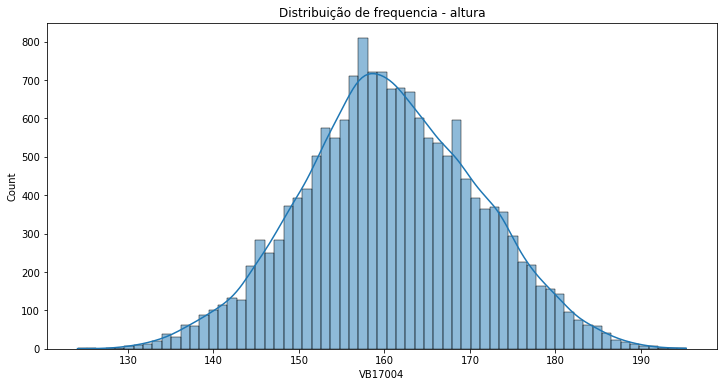

In [49]:
import seaborn as sns

ax = sns.histplot(data = df, x = "VB17004", kde = True)
ax.figure.set_size_inches(12, 6)
ax.set_title("Distribuição de frequencia - altura")


Utilizando o "hue", plotamos histogramas baseados nos dados escolhidos no argumento. No exemplo abaixo, a pergunta sobre o sexo dos alunos foi utilizada para separar o gráfico em 2:

Text(0.5, 1.0, 'Distribuição de frequencia - altura')

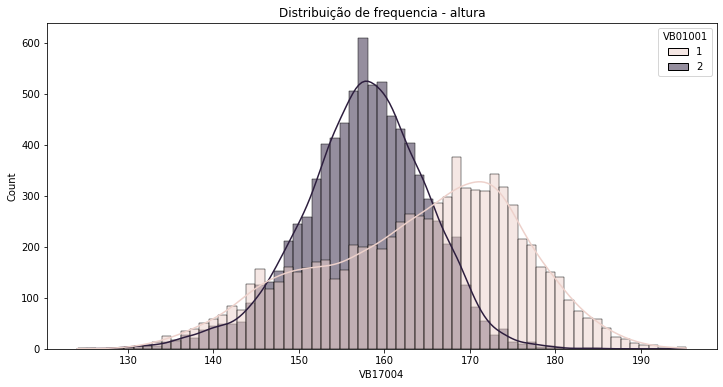

In [50]:
ax = sns.histplot(data = df, x = "VB17004", kde = True, hue = "VB01001")
ax.figure.set_size_inches(12, 6)
ax.set_title("Distribuição de frequencia - altura")

O histograma com divisão por uma segunda forma de classficação, como o exemplo acima, acaba não sendo o plot ideal quando essa forma possui multiplas classes.


Text(0.5, 1.0, 'Distribuição de frequencia - altura')

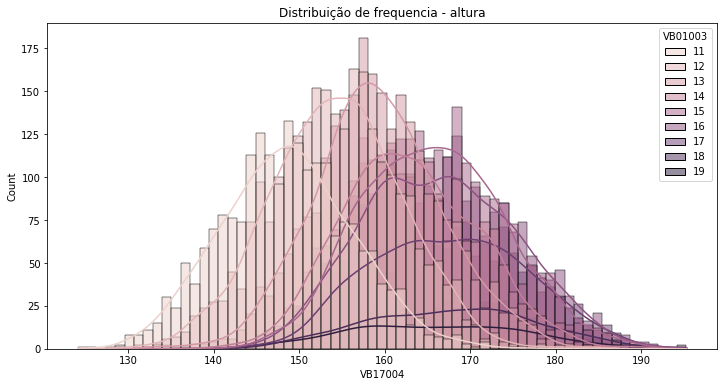

In [51]:
ax = sns.histplot(data = df, x = "VB17004", kde = True, hue = "VB01003")
ax.figure.set_size_inches(12, 6)
ax.set_title("Distribuição de frequencia - altura")

Para esse tipo de sitação, podemos utilizar multiplas figuras de histogramas com as diferentes classificações ou utilizar um box plot.

#### Desafio 07: Calcular o desvio padrão, a média, a moda e a mediana e plotar no gráfico de histogramas.


In [52]:
def plot_hist_e_estatisticas_de_centralidade(cod_pergunta: str, hue = None, bins = 'auto', df = df, print_mode = False):
   # Plot
  fig, ax = plt.subplots()
  sns.histplot(data = df, x = cod_pergunta, ax = ax, hue = hue, bins = bins, kde = True)

  ax.figure.set_size_inches(12, 6)

  # Hist Extras

  # media
  media = df[cod_pergunta].mean()
  ax.axvline(x = media, lw = 3, color = 'g', label = "Média")

  # mediana
  mediana = df[cod_pergunta].median()
  ax.axvline(x = mediana, lw = 3, color = 'r', label = "Mediana")

  # moda
  moda = df[cod_pergunta].mode()
  ax.axvline(x = moda[0], lw = 3, color = 'yellow', label = "Moda")
  
  if print_mode == True:
    print(f'\n\nA média é {media};')
    print(f'A mediana é {mediana};')
    print(f'A moda é {moda[0]}.\n')

  # desvio padrao
  desv_pad = [media - df[cod_pergunta].std(), df[cod_pergunta].std() + media]
  ax.axvspan(desv_pad[0], desv_pad[1], color = 'black', alpha = 0.3, label = "+/- 1 Desvio Padrão") 

  # Customização
  plt.legend()
  ax.set_title(f"Distribuição de frequencia - {dicionario.loc[dicionario['VARIÁVEL'] == cod_pergunta]['QUESTIONÁRIO DO ALUNO']}")

  return fig, ax

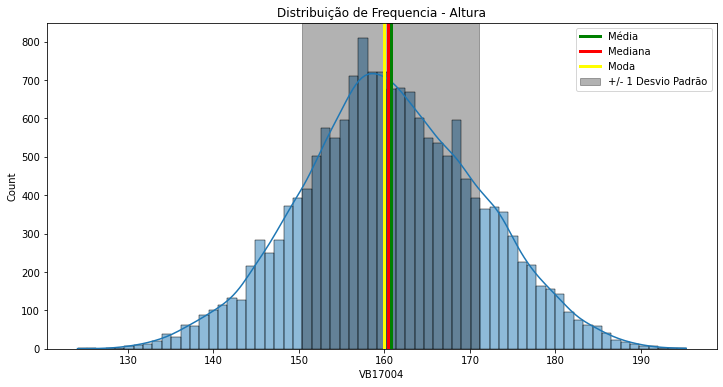

In [53]:
fig, ax = plot_hist_e_estatisticas_de_centralidade("VB17004")
ax.set_title("Distribuição de Frequencia - Altura")
plt.show()

#### Desafio 08 - Fazer a análise com o histograma para outras informações da base de dados.

Uma das variáveis que me chamou atenção na pesquisa foi a que corresponde ao tempo que o aluno toma para chegar ao colégio indo à pé ou de bicicleta. 

Vamos plotar ela em um histograma.

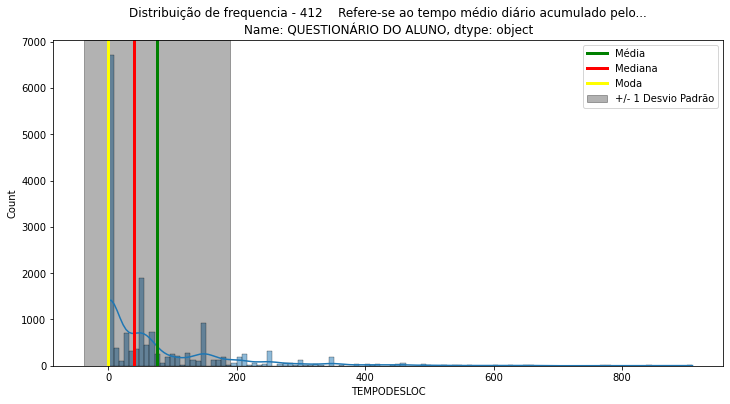

In [54]:
fig, ax = plot_hist_e_estatisticas_de_centralidade('TEMPODESLOC')
ax;

Irei eliminar do plot os alunos que utilizam outros meios de transporte:

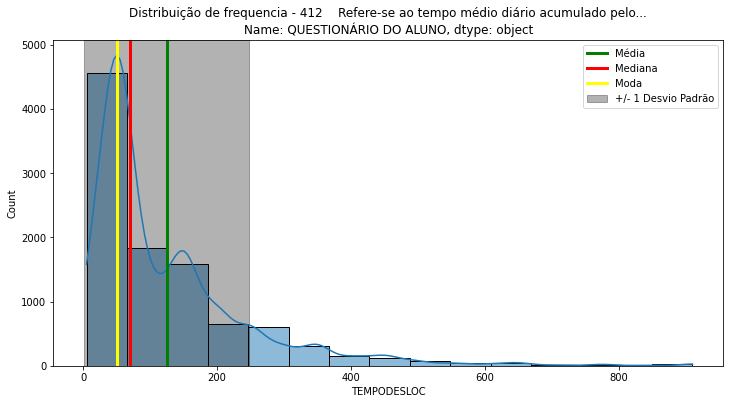

In [55]:
fig, ax = plot_hist_e_estatisticas_de_centralidade('TEMPODESLOC', df = df.loc[df['TEMPODESLOC'] > 0], bins = 15)
ax;



A média é 124.59165335463258;
A mediana é 70.0;
A moda é 50.0.



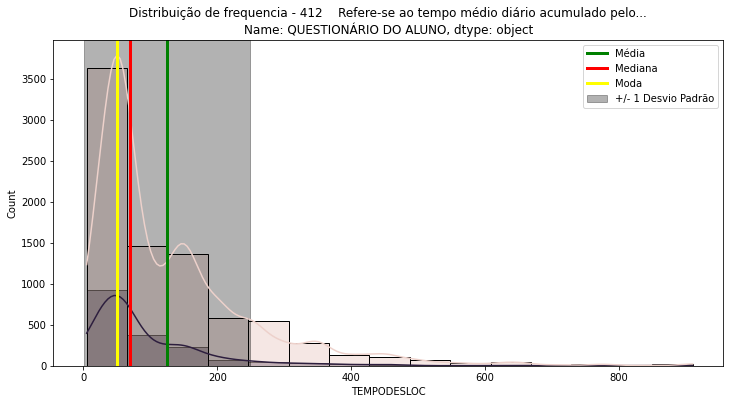

In [56]:
fig, ax = plot_hist_e_estatisticas_de_centralidade('TEMPODESLOC', df = df.loc[df['TEMPODESLOC'] > 0], bins = 15, hue = 'V0007', print_mode = True)
ax;

Percebe-se que a distribuição continua igual quando separamos os alunos entre aqueles que estão na escola pública daqueles que estão na escola privada. Temos que, em média, os alunos pesquisados que vão de bicicleta ou à pé da casa para a escola e da escola para casa, tomam cerca de 2 horas para realizar o deslocamento (ida e volta).

Por curiosidade minha e por trabalhar em tabacaria, gostaria de observar os dados sobre o uso de tabaco entre os mais jovens:

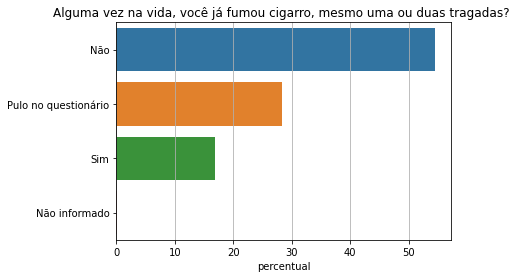

"Alguma vez na vida, você já fumou cigarro, mesmo uma ou duas tragadas?",frequencia,percentual
Não,9030,54.542160
Pulo no questionário,4706,28.424740
Sim,2803,16.930418
Não informado,17,0.102682


In [57]:
criar_tab_freq("VB04001", plot = True)

Percebemos que a maioria dos alunos relata nunca ter experimentado cigarro. Uma vez que a pesquisa abrange alunos de diversas idades, gostaria de observar a mudança desses valores de acordo com a idade dos alunos.

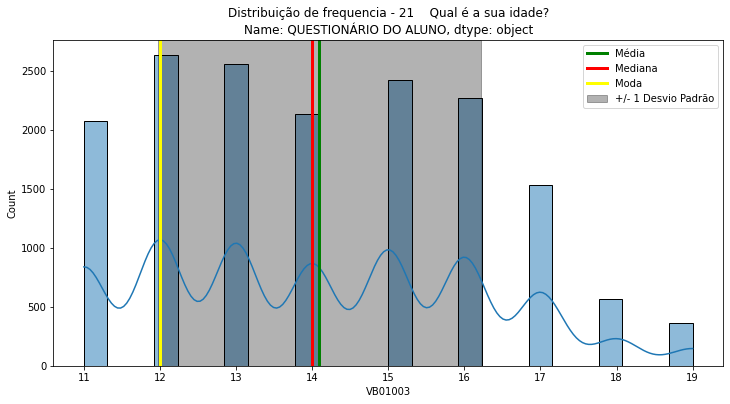

In [58]:
fig, ax = plot_hist_e_estatisticas_de_centralidade("VB01003")

Observando a distribuição da idade dos alunos, percebemos que a grande maioria dos alunos está entre os 12 e 16 anos.

Como gostaria de observar as mudanças dos valores de acordo com a idade, irei criar um crosstab com a normalização sendo feita na idade:

In [59]:
respostas = criar_dicionario_respostas("VB04001")[0]['QUESTIONÁRIO DO ALUNO'] # cigarro
colunas = criar_dicionario_respostas('VB01003')[0]['QUESTIONÁRIO DO ALUNO'] # idade

frequencia_cruzada = pd.crosstab(df['VB04001'], df['VB01003'], normalize = 'columns') * 100
frequencia_cruzada.rename(index = respostas, columns=colunas, inplace=True)

print('Alguma vez na vida, você já fumou cigarro, mesmo uma ou duas tragadas? ')

frequencia_cruzada

Alguma vez na vida, você já fumou cigarro, mesmo uma ou duas tragadas? 


VB01003,11 anos ou menos,12 anos,13 anos,14 anos,15 anos,16 anos,17 anos,18 anos,19 anos ou mais
VB04001,,,,,,,,,
Pulo no questionário,100.0,100.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sim,0.0,0.0,12.338930,20.768870,21.979381,27.533040,33.376708,38.365897,43.490305
Não,0.0,0.0,87.309645,79.184248,77.979381,72.378855,66.428107,61.634103,56.232687
Não informado,0.0,0.0,0.351425,0.046882,0.041237,0.088106,0.195185,0.000000,0.277008


### VIDEO 2 - Boxplot e Separatrizes

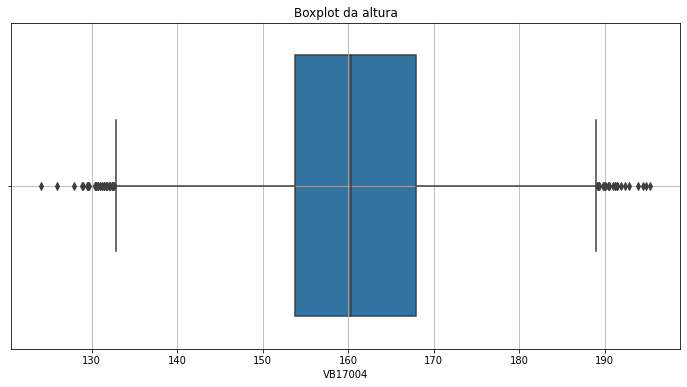

In [60]:
ax = sns.boxplot(data = df, x = "VB17004")
ax.figure.set_size_inches(12, 6)
ax.set_title("Boxplot da altura")
plt.grid()

O boxplot traz algumas informações:
- O range dos dados sobre a altura no eixo X;
- O primeiro quartil (Q1 - mostrado como a linha esquerda da box), definindo que 25% da amostra está abaixo de ~1,54m;
- A mediana (Q2 - na linha central);
- O terceiro quartil (Q3 - mostrado como a linha direita da box), definindo que 75% da amostra está abaixo de ~1,68m.
- Valores considerados outliers.

Agora, vamos plotar boxplots de altura separado pelo sexo dos alunos:

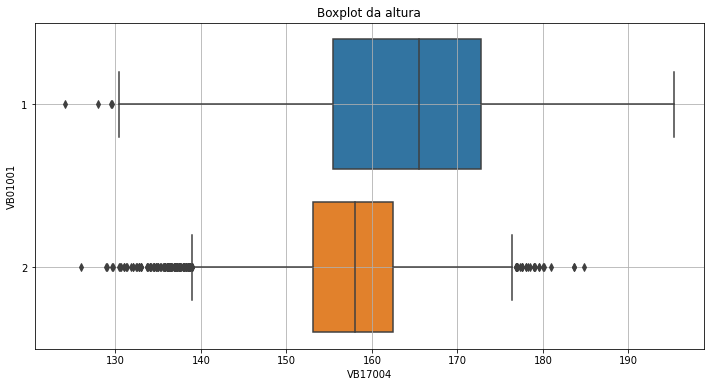

In [61]:
ax = sns.boxplot(data = df, y = "VB01001", x = "VB17004", orient = "h")
ax.figure.set_size_inches(12, 6)
ax.set_title("Boxplot da altura")
plt.grid()

Agora, vamos plotar o que não conseguimos no histograma:

A distribuição da altura de acordo com a idade dos alunos:


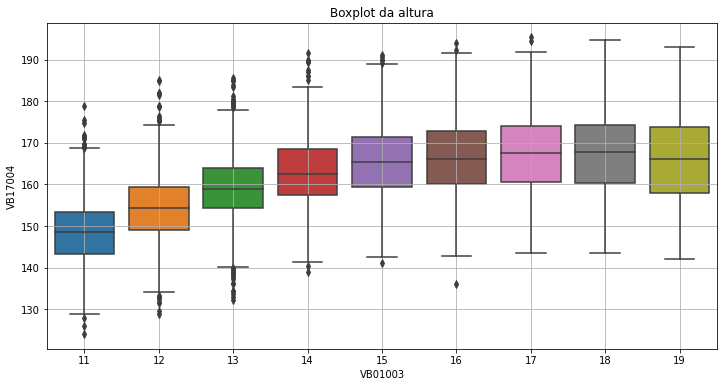

In [62]:
ax = sns.boxplot(data = df, x = "VB01003", y = "VB17004", orient = "v")
ax.figure.set_size_inches(12, 6)
ax.set_title("Boxplot da altura")
plt.grid()

Podemos, inclusive, separar o boxplot acima por sexo também:

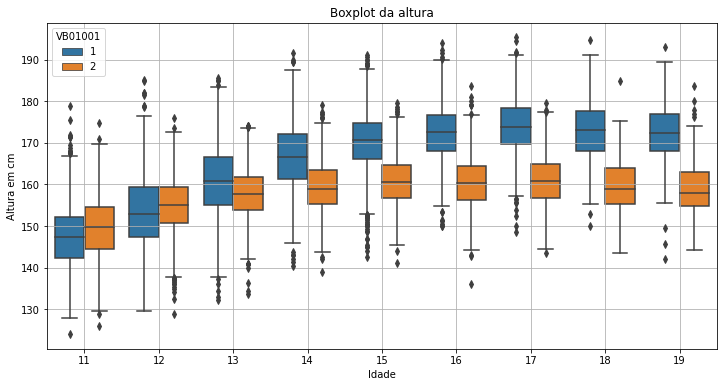

In [63]:
ax = sns.boxplot(data = df, x = "VB01003", y = "VB17004", hue = "VB01001", orient = "v")
ax.figure.set_size_inches(12, 6)
ax.set_title("Boxplot da altura")
ax.set_xlabel("Idade")
ax.set_ylabel("Altura em cm")
plt.grid()

#### Desafio 09: Pesquisar como são determinados os outliers no boxplot pela documentação do seaborn.

## AULA 5 - MEDIDA DE CENTRALIDADE E DISPERSÃO

### VIDEO 1 - Medidas de centralidade

In [64]:
# Descobrindo a média da altura dos alunos

df["VB17004"].mean()

160.71311307078818

In [65]:
# Média de acordo com o sexo da pessoa
df.groupby("VB01001")["VB17004"].mean()

VB01001
1    163.860758
2    157.558617
Name: VB17004, dtype: float64

In [66]:
# Moda da altura dos alunos
df["VB17004"].mode()

0    160.0
dtype: float64

In [67]:
# Groupby com multiplos parametros
df.groupby(["VB01001", "VB01003"])["VB17004"].mean()

VB01001  VB01003
1        11         147.617753
         12         153.696764
         13         160.719801
         14         166.406922
         15         170.336297
         16         172.424933
         17         173.814341
         18         173.024561
         19         172.143158
2        11         149.522512
         12         154.965021
         13         157.673105
         14         159.340320
         15         160.759848
         16         160.386527
         17         160.907937
         18         159.438462
         19         158.977193
Name: VB17004, dtype: float64

#### Desafio 10: Fazer a descrição de outras variáveis, analisar e compartilhar suas análises no discord.

In [68]:
# Já foi feito acima.

#### Desafio 11: Fazer o calculo da média por sexo e idade utilizando o crosstab.

In [69]:
pd.crosstab(df["VB01001"], df["VB01003"], values = df["VB17004"], aggfunc = 'mean')

VB01003,11,12,13,14,15,16,17,18,19
VB01001,,,,,,,,,
1,147.617753,153.696764,160.719801,166.406922,170.336297,172.424933,173.814341,173.024561,172.143158
2,149.522512,154.965021,157.673105,159.340320,160.759848,160.386527,160.907937,159.438462,158.977193


#### Super Desafio 01: Criar um dicionário para facilitar a busca da pergunta.

In [70]:
dict_base_de_dados = dict()

for codigo in df.columns.to_list()[:-5]:
  respostas_raw, idx = criar_dicionario_respostas(codigo)
  respostas = respostas_raw["QUESTIONÁRIO DO ALUNO"]

  titulo_perg = dicionario.iloc[idx, 1] 

  dict_base_de_dados[codigo] = {'questao':titulo_perg , 'respostas': respostas}


In [71]:
dict_base_de_dados['VB01003']

{'questao': 'Qual é a sua idade?',
 'respostas': {11: '11 anos ou menos',
  12: '12 anos',
  13: '13 anos',
  14: '14 anos',
  15: '15 anos',
  16: '16 anos ',
  17: '17 anos',
  18: '18 anos',
  19: '19 anos ou mais'}}

#### Super Desafio 02: De alguma maneira, sumarizar as perguntas (Dica: utilizar NLTK, GESIM).

In [72]:
# Em outro momento

### VIDEO 2 - Desvio Padrão passo a passo

In [73]:
media_altura = df['VB17004'].mean()
df['MEDIA_ALTURA'] = media_altura
diferenca_media_altura = df["VB17004"] - df["MEDIA_ALTURA"]

# df[["VB17004", "MEDIA_ALTURA"]]
diferenca_media_altura


0        -3.713113
1        -8.713113
2         0.686887
3        11.786887
4         6.786887
           ...    
16551     7.186887
16552    25.086887
16553    -1.313113
16554    -2.913113
16555     3.186887
Length: 16556, dtype: float64

In [74]:
# Podemos calcular a varianca ao descobrir o valor médio da diferença quadrada
(diferenca_media_altura**2).mean()

106.9105945368652

In [75]:
# Outro método para calcular a variança amostral é 1/N-1 *  SUM(diferença_quadrada)
variancia_amostral = (1/(len(df)-1)) * (diferenca_media_altura**2).sum()
variancia_amostral

106.91705244049119

In [76]:
# Como a variancia é uma unidade elevada ao quadrado, utilizamos a raíz quadrada para calcular o desvio padrão
desvio_pad_altura = variancia_amostral**(1/2)
desvio_pad_altura

10.340070233827776

#### Desafio 12: Estudar medidas de dispersão e calcular utilizando o pandas. Realizar os calculos para as outras colunas numéricas.

In [77]:
media_peso = df['VB17003'].mean()
variancia_peso = df['VB17003'].var()
desv_pad_peso = df['VB17003'].std()

print(media_peso, variancia_peso, desv_pad_peso) 

54.70558105822677 211.64035060768379 14.547864125282576


## AULA 06 - INTERVALO DE CONFIANÇA E TESTES

### VIDEO 1 - Intervalo de confiança

Como saber o quanto nossa amostra (alunos participantes do PeNSE entre 11 e 19 anos) representa toda a população de alunos brasileiros dessa mesma faixa etária?

No exemplo abaixo, utilizamos os dados da altura e a biblioteca statsmodels para calcular em que intervalo está a média da altura da população descrita pela amostra com o nível de confiança de 95% (z-test).

In [78]:
from statsmodels.stats.weightstats import zconfint

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [79]:
zconfint(df["VB17004"])

(160.5556082427712, 160.87061789880892)

Além do z-test, podemos verificar (também utilizando a statsmodels) o intervalo de confiança utilizando o t-test. Segue o exemplo abaixo: 

In [80]:
from statsmodels.stats.weightstats import DescrStatsW

In [81]:
desc_altura = DescrStatsW(df["VB17004"])
desc_altura.tconfint_mean()

(160.55559672649298, 160.8706294150872)

In [82]:
df["VB17004"].mean()

160.71311307078818

#### Desafio 13: Estudar mais os termos definidos hoje: intervalo de confiança, nível de confiança e significancia.

#### Desafio 14: Plotar o intervalo de confiança no histograma das alturas.

Text(0.5, 1.0, 'Distribuição de frequencia - altura')

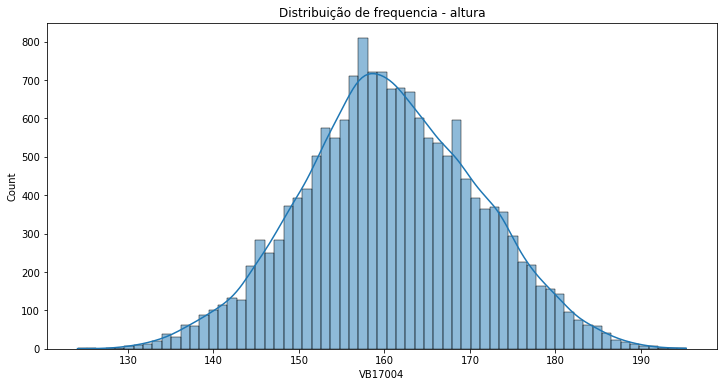

In [83]:
ax = sns.histplot(data = df, x = "VB17004", kde = True)
ax.figure.set_size_inches(12, 6)
ax.set_title("Distribuição de frequencia - altura")

### VIDEO 2 - Testes estatísticos

Vamos utilizar agora o ztest() para verificar a distribuição das alturas de acordo com o sexo. 

Utilizando um boxplot, podemos verificar os dados sobre a altura das pessoas que se identificam pelo sexo feminino são mais centralizados enquanto no sexo masculino acabam sendo um pouco mais dispersos.

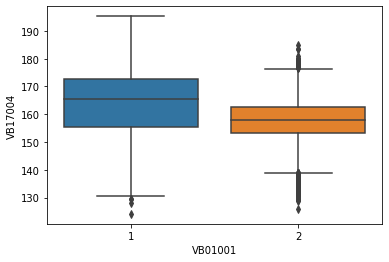

In [84]:
sns.boxplot(data = df, x = "VB01001", y = "VB17004");

In [85]:
from statsmodels.stats.weightstats import ztest

dist_altura_m = df.query("VB01001 == 1")["VB17004"]
dist_altura_f = df.query("VB01001 == 2")["VB17004"]

_, p_value = ztest(dist_altura_m, dist_altura_f)

In [86]:
p_value

0.0

In [87]:
_, p_value = ztest(dist_altura_m, dist_altura_m)
p_value

1.0

O p-value, retornado pelo ztest, é uma medida de similaridade de distribuição. Quando menor que 0.05 (para termos 95% de confiança), a hipótese nula deve ser descartada (como é esse caso). Se utilizassemos dois datasets iguais ou com a exata mesma distribuição, teríamos o p-value = 1.

No entanto, devemos ser cuidadosos: o ztest pede algumas condições sobre o dataset e uma delas é a normalidade na distribuição dos dados. [Como vimos ao plotar o histograma das alturas, isso não é o que acontece para os alunos do sexo masculino](https://colab.research.google.com/drive/1mjPO2A1Lf6QzePCo6mzmQwcIiDtm2IVo#scrollTo=Y7m8BXn8sx78)

In [88]:
from scipy.stats import normaltest

normaltest(dist_altura_m)

NormaltestResult(statistic=341.30659152353655, pvalue=7.695118853996524e-75)

Utilizando o normaltest nos dados sobre a altura masculina, notamos que o p-value é menor que 0.05, o que descarta a hipóstese nula (nesse caso, a afirmação de que essa distribuição é normal)


In [89]:
from scipy.stats import ranksums

ranksums(dist_altura_m, dist_altura_f)

RanksumsResult(statistic=40.7525576033863, pvalue=0.0)